In [1]:
from spatial_statistics_tools import *
from process_images import *
from skimage import feature
from skimage.filters import gaussian


# specify directory
dir_ = "/Users/lukasjudith/Documents/Studium/Master Physik Heidelberg/Semester 2/01 HCI project/Code/spatial-statistical-analysis"
os.chdir(dir_)

In [2]:
extracted_imgs = [
    'U373-HB-SCC-3E10_HALO-SiR-01_czi_#04.tif',
    'U373-HB-SCC-3E10_HALO-SiR-01_czi_#11.tif',
    'U373_A-KO_HALO-B-SiR-01_czi_#01.tif',
    'U373_A-KO_HALO-B-SiR-01_czi_#03.tif',
    'U373_A-KO_HALO-B-SiR-01_czi_#04.tif',
    'U373_A-KO_HALO-B-SiR-01_czi_#06.tif',
    'U373_A-KO_HALO-B-SiR-01_czi_#07.tif',
    'U373_A-KO_HALO-B-SiR-01_czi_#08.tif',
    'U373_A-KO_HALO-B-SiR-01_czi_#09.tif',
    'U373_A-KO_HALO-B-SiR-01_czi_#10.tif',
    'U373_A-KO_HALO-B-SiR-02_czi_#01.tif',
    'U373_A-KO_HALO-B-SiR-02_czi_#06.tif',
    'U373_A-KO_HALO-B-SiR-02_czi_#07.tif',
    'U373_A-KO_HALO-B-SiR-02_czi_#11.tif',
    'U373_A-KO_HALO-B-SiR-02_czi_#12.tif',
    'U373_A-KO_HALO-B-SiR-02_czi_#14.tif',
    'U373_A-KO_HALO-B-SiR-02_czi_#15.tif',
    'U373_HALO-A-SiR_B-KO-01_czi_#01.tif',
    'U373_HALO-A-SiR_B-KO-01_czi_#02.tif',
    'U373_HALO-A-SiR_B-KO-01_czi_#17.tif',
    'U373_HALO-A-SiR_B-KO-01_czi_#21.tif',
    'U373_HALO-A-SiR_B-KO-02_czi_#02.tif',
    'U373_HALO-A-SiR_B-KO-02_czi_#05.tif',
    'U373_HALO-A-SiR_B-KO-02_czi_#06.tif',
    'U373_HALO-A-SiR_B-KO-02_czi_#08.tif',
    'U373_HALO-A-SiR_B-KO-02_czi_#11.tif',
    'U373_HALO-A-SiR_B-KO-02_czi_#14.tif',
    "U373_HALO-A-SiR_B-KO-21-30_czi_#02.tif"
    "U373_HALO-A-SiR_B-KO-31-40_czi_#03.tif"
    "U373_HALO-A-SiR_B-KO-41-50_czi_#01.tif"
]

In [3]:
folder = "extracted_tifs/"
a = os.listdir(folder)
a.sort()
a

['.DS_Store',
 '2021-05-20_HB',
 '2021-06-14_A-KO_HB',
 '2021-06-15_HA_B-KO',
 '2021-07-13_HA',
 '2021-07-19_A-KO_HB',
 '2021-07-26_HB',
 '2021-07-27_SA_HB']

## Load cell images and compute the K function

In [4]:
z_slices_clca = np.array([
    5,8,10,7,5,5,4,3,5,3,
    13,11,11,9,9,5,7,9,6,5,
    10,12,12,11,11,11,6,6,8,6,
    11,10,13,9,10,9,13,12,10,10,
    11,12,9,9,11,10,10,9,9,11,
    11,10,9,12,10,11,9,10,9,9,
    10,9,10,9,11,10,10,10,12,12,
    11,11,10,10,10,6,10,12,11,10,
    11,10,10,8,12,8,11,10,12
])



In [2]:
filenames_clcb_ako = [
    "U373_A-KO_HALO-B-SiR-01_czi_#02.tif",#, 14],
    "U373_A-KO_HALO-B-SiR-01_czi_#05.tif",##, 14], #13??
    "U373_A-KO_HALO-B-SiR-02_czi_#02.tif",##, 5],  #11?
    "U373_A-KO_HALO-B-SiR-02_czi_#03.tif",##, 5], #?? really weird
    "U373_A-KO_HALO-B-SiR-02_czi_#04.tif",##, 0], # 23? core is strongest there, weird
    "U373_A-KO_HALO-B-SiR-02_czi_#05.tif",##, 6], # 17?
    "U373_A-KO_HALO-B-SiR-02_czi_#08.tif",##, 2], # 7 ? 
    "U373_A-KO_HALO-B-SiR-02_czi_#09.tif",##, 20],
    "U373_A-KO_HALO-B-SiR-02_czi_#10.tif",##, 5],
    "U373_A-KO_HALO-B-SiR-02_czi_#13.tif",##, 3],
]
filenames_clca_bko = [
    "U373_HALO-A-SiR_B-KO-02_czi_#01.tif",##, 17], # very wide core, can be underdisperse in lower z
    "U373_HALO-A-SiR_B-KO-02_czi_#03.tif",##, 3],
    "U373_HALO-A-SiR_B-KO-02_czi_#04.tif",##, 14], # very large core
    "U373_HALO-A-SiR_B-KO-02_czi_#07.tif",##, 2],
    "U373_HALO-A-SiR_B-KO-02_czi_#09.tif",#, 1],
    "U373_HALO-A-SiR_B-KO-02_czi_#10.tif",##, 1],
    "U373_HALO-A-SiR_B-KO-02_czi_#12.tif",##, 6],
    "U373_HALO-A-SiR_B-KO-02_czi_#13.tif",##, 0],
    "U373_HALO-A-SiR_B-KO-02_czi_#15.tif",##, 10], # weird structures
    "U373_HALO-A-SiR_B-KO-01_czi_#03.tif",##, 0],
]

filenames_clca = [
    "U373_HALO-A-SiR_B-KO-11-20_czi_#01.tif",
    "U373_HALO-A-SiR_B-KO-11-20_czi_#02.tif",
    "U373_HALO-A-SiR_B-KO-11-20_czi_#03.tif",
    "U373_HALO-A-SiR_B-KO-11-20_czi_#04.tif",
    "U373_HALO-A-SiR_B-KO-11-20_czi_#05.tif",
    "U373_HALO-A-SiR_B-KO-11-20_czi_#06.tif",
    "U373_HALO-A-SiR_B-KO-11-20_czi_#07.tif",
    "U373_HALO-A-SiR_B-KO-11-20_czi_#08.tif",
    "U373_HALO-A-SiR_B-KO-11-20_czi_#09.tif",
    "U373_HALO-A-SiR_B-KO-11-20_czi_#10.tif",
    "U373_HALO-A-SiR_B-KO-21-30_czi_#01.tif",
    "U373_HALO-A-SiR_B-KO-21-30_czi_#02.tif",
    "U373_HALO-A-SiR_B-KO-21-30_czi_#03.tif",
    "U373_HALO-A-SiR_B-KO-21-30_czi_#04.tif",
    "U373_HALO-A-SiR_B-KO-21-30_czi_#05.tif",
    "U373_HALO-A-SiR_B-KO-21-30_czi_#06.tif",
    "U373_HALO-A-SiR_B-KO-21-30_czi_#07.tif",
    "U373_HALO-A-SiR_B-KO-21-30_czi_#08.tif",
    "U373_HALO-A-SiR_B-KO-21-30_czi_#09.tif",
    "U373_HALO-A-SiR_B-KO-21-30_czi_#10.tif",
]

filenames_clcb = [
    "U373-HB-SCC-3E10_HALO-SiR-01_czi_#01.tif",
    "U373-HB-SCC-3E10_HALO-SiR-01_czi_#02.tif",
    "U373-HB-SCC-3E10_HALO-SiR-01_czi_#03.tif",
    "U373-HB-SCC-3E10_HALO-SiR-01_czi_#05.tif",
    "U373-HB-SCC-3E10_HALO-SiR-01_czi_#06.tif",
    "U373-HB-SCC-3E10_HALO-SiR-01_czi_#07.tif",
    "U373-HB-SCC-3E10_HALO-SiR-01_czi_#08.tif",
    "U373-HB-SCC-3E10_HALO-SiR-01_czi_#09.tif",
    "U373-HB-SCC-3E10_HALO-SiR-01_czi_#10.tif",
    "U373-HB-SCC-3E10_HALO-SiR-01_czi_#12.tif",
]


#--------------
# Parameters
#--------------

# choose right channel and z position in .tif file
channel = 0

# params for the gaussian blur/mask
sigma = 60
cutoff = 0.6

z = 0


# others 
thresh = 0
desired_int = 500000000

# name of the folder storing .tif files of cell images
folder = "extracted_tifs" 
#filename = "U373-HB-SCC-3E10_HALO-SiR-01_czi_#01.tif"
#filename = "U373_HALO-A-SiR_B-KO-71-80_czi_#03.tif"


#---------------
# Run Analysis
#---------------

Ks = []

plot = False
printout = False
save = True
mask_mode='blur'

range_of_t = np.arange(1, 1200, 40)

ko = True
for filename in filenames_clca+filenames_clcb:

    # contains filename and other relevant parameters
    #filename, z = filename_plus
    
    params = [filename, folder, z, channel, mask_mode, sigma, cutoff, thresh, desired_int, plot, printout, save]
    img_cropped, img_csr, cell_mask, img_blurred  = process_image2D(*params)
    #img_cropped, img_csr = process_image2D(*params)
    
   # if len(np.unique(cell_mask)) > 1:
   #     print("ERROR")


    K_values_cell = ripleys_K_fast(img_cropped, range_of_t, printout=True)
    K_values_csr = ripleys_K_fast(img_csr, range_of_t, printout=True)

    Ks.append([
        filename, K_values_cell, K_values_csr
    ])
    

Processing U373_HALO-A-SiR_B-KO-11-20_czi_#01.tif ...


FileNotFoundError: [Errno 2] No such file or directory: '/Users/lukasjudith/Documents/Studium/Master Physik Heidelberg/Semester 2/01 HCI project/Code/spatial-statistical-analysis/extracted_tifs/U373_HALO-A-SiR_B-KO-11-20_czi_#01.tif'

In [30]:
ko = False

print(a)

file shows clca
file shows clca
file shows clca
file shows clca
file shows clca
file shows clca
file shows clca
file shows clca
file shows clca
file shows clca
file shows clcb
file shows clcb
file shows clcb
file shows clcb
file shows clcb
file shows clcb
file shows clcb
file shows clcb
file shows clcb
file shows clcb


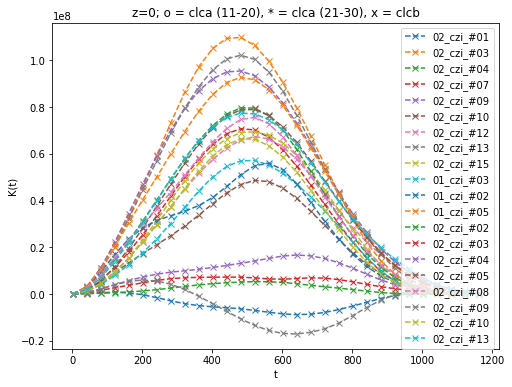

In [36]:
# results when using FFT-based auto-correlation
plt.figure(figsize=(8,6))
plt.title("K function for real distr. vs. CSR distr.")


Ks_clca = []
Ks_clcb = []

for [filename, K_values_cell, K_values_csr] in Ks:
    
    
    if filename[5:7] == 'HA': 
        Ks_clca.append(np.array(K_values_cell)-np.array(K_values_csr))
        
        print("file shows clca")
        if "-20" in filename:
            print("until 20")
            marker='o'
        elif "-30" in filename:
            print("until 30")
            marker='*'
            
    else:
        Ks_clcb.append(np.array(K_values_cell)-np.array(K_values_csr))
        
        print("file shows clcb")
        marker='x'
        
    
        
    plt.plot(range_of_t, np.array(K_values_cell)-np.array(K_values_csr), label=filename[-14:-4], marker=marker, linestyle="dashed")
    
#plt.plot(range_of_t, np.array(K_values_clcb) - np.array(K_values_csr), color='green')
#plt.plot([], color='blue', label="Distr. CLCA_BKO - CSR")
#plt.plot([], color='red', label="Distr. CLCB_AKO - CSR")
#plt.title("o = A-KO, x = B-KO")
plt.title(f"z={z}; o = clca (11-20), * = clca (21-30), x = clcb")
plt.xlabel("t")
plt.ylabel("K(t)")
plt.legend(loc='upper right')

a = "_KO_" if ko else ""
plt.savefig("results/k_functions_clca_clcb_comparison"+a+f"_{mask_mode}_mode_z{z}_sigma{sigma}_cut{cutoff}_".replace('.','')+".pdf")
plt.show()


array([3.29567276e+03, 1.44756662e+06, 5.11367083e+06, 1.03774620e+07,
       1.65247625e+07, 2.30584062e+07, 2.96504527e+07, 3.61823282e+07,
       4.25308349e+07, 4.85048691e+07, 5.38375429e+07, 5.81229298e+07,
       6.07974349e+07, 6.13335926e+07, 5.94219166e+07, 5.52078549e+07,
       4.91865154e+07, 4.20181811e+07, 3.43965010e+07, 2.69069659e+07,
       1.99983886e+07, 1.39939541e+07, 9.12344337e+06, 5.49731457e+06,
       3.04407066e+06, 1.48855642e+06, 5.93178870e+05, 1.69175241e+05,
       2.81383655e+04, 1.20815638e+03])

In [5]:
# specify how many std the error envelope spans
n_std = 1


clca_mean = np.mean(Ks_clca, axis=0)
clcb_mean = np.mean(Ks_clcb, axis=0)
clca_std = np.std(Ks_clca, axis=0) 
clcb_std = np.std(Ks_clcb, axis=0) 

# compare to K values from one discrete image
plt.figure(figsize=(8,6))


plt.title(f"Average over K values, {n_std} std error envelope")
plt.plot(range_of_t, clca_mean, label="Average of CLCA")
plt.fill_between(range_of_t, clca_mean-clca_std*n_std ,clca_mean+clca_std*n_std, alpha=0.3)
plt.plot(range_of_t, clcb_mean, label="Average of CLCB")
plt.fill_between(range_of_t, clcb_mean-clcb_std*n_std ,clcb_mean+clcb_std*n_std, alpha=0.3)

plt.show()

NameError: name 'Ks_clca' is not defined

In [ ]:
# used:
#sigma = 7
#cutoff = -10
#thresh = 0 


# higher than average? for clca
"U373_HALO-A-SiR_B-KO-11-20_czi_#04.tif" 
"U373_HALO-A-SiR_B-KO-11-20_czi_#03.tif"
# highest one
"U373_HALO-A-SiR_B-KO-11-20_czi_#01.tif"


# same value as the above for clcb
"U373-HB-SCC-3E10_HALO-SiR-01_czi_#10.tif"
"U373-HB-SCC-3E10_HALO-SiR-01_czi_#06.tif"



# some of the lower ones, clca
"U373-HB-SCC-3E10_HALO-SiR-01_czi_#08.tif"

# too low? clcb
"U373-HB-SCC-3E10_HALO-SiR-01_czi_#07.tif"



### Inspect individual images

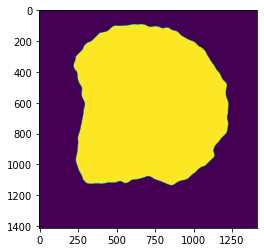

In [24]:
filenames_clca = [
    "U373_HALO-A-SiR_B-KO-11-20_czi_#01.tif",
    "U373_HALO-A-SiR_B-KO-11-20_czi_#02.tif",
    "U373_HALO-A-SiR_B-KO-11-20_czi_#03.tif",
    "U373_HALO-A-SiR_B-KO-11-20_czi_#04.tif",
]

filenames_clcb = [
    "U373-HB-SCC-3E10_HALO-SiR-01_czi_#01.tif",
    "U373-HB-SCC-3E10_HALO-SiR-01_czi_#02.tif",
    "U373-HB-SCC-3E10_HALO-SiR-01_czi_#03.tif",
    "U373-HB-SCC-3E10_HALO-SiR-01_czi_#05.tif",
]

#--------------
# Parameters
#--------------

# choose right channel and z position in .tif file
channel = 0

# params for the gaussian blur/mask
sigma = 60
cutoff = 0.5

# others 
thresh = 0
desired_int = 500000000

# name of the folder storing .tif files of cell images
folder = "extracted_tifs" 

#filename = "U373_HALO-A-SiR_B-KO-11-20_czi_#01.tif"
#filename = "U373_HALO-A-SiR_B-KO-11-20_czi_#07.tif"
filename = "U373-HB-SCC-3E10_HALO-SiR-01_czi_#03.tif"
#filename = "U373-HB-SCC-3E10_HALO-SiR-01_czi_#09.tif"

# outlier:
#filename =  "U373-HB-SCC-3E10_HALO-SiR-01_czi_#07.tif"

z = 0

#best_z = find_best_cross_section(filename, folder)
#print("best z:", best_z)
#z = best_z

#folder, filename = "extracted_tifs/2021-07-13_HA", "U373_HALO-A-SiR_B-KO-31-40_czi_#07.tif"
folder, filename = "extracted_tifs/2021-07-26_HB", "U373-HB_Halo-SiR_01-12_czi_#09.tif"

#---------------
# Run Analysis
#---------------
path = os.path.join(folder, filename)
z = 10
img_array, _ = load_image2D(path, z, channel=0)

mask = create_mask(img_array, sigma=20, iter_erode=35, iter_dilate=20, folder=".", check_plot=False)

name = "mask2_clcb.npy"
np.save(name, mask)

plt.imshow(mask)

In [17]:
np.save

<function numpy.save(file, arr, allow_pickle=True, fix_imports=True)>

KeyboardInterrupt: 

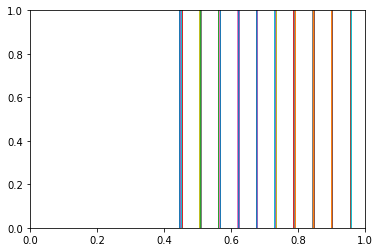

In [71]:
plt.hist(mask)

In [1]:
def find_best_cross_section(filename, folder):
    
    best_z = 0
    best_pixel_sum = 0
   
    for z in range(30):
        
        # get array with all pixel intensities and metadata of image
        im, metadata = load_image(filename, folder) 

        # pick desired channel
        zxy_arr = im[:, channel, :, :]
        # extract 2D slices
        xy_array = zxy_arr[z, :, :].astype("float32")
        img_array = xy_array.copy()

        # create mask to crop out cell using Gaussian blur
       # cell_mask, img_blurred = create_cell_mask(img_array, sigma, cutoff)
        
        new_pixel_sum = np.max(img_array)
        #print(z, new_pixel_sum)
        
        if new_pixel_sum > best_pixel_sum:
            best_pixel_sum = new_pixel_sum
            best_z = z
            
    return best_z


def print_tif_series(filename, folder, destination="tif_series", channel=0):
    """
    From one .tif file, print every xy slice for all z values.
    """
    print(f"Creating series for .tif file {filename}")
    im, _ = load_image(filename, folder) 

    # pick desired channel
    zxy_arr = im[:, channel, :, :]
    
    N_z = zxy_arr.shape[0]

    fig, ax = plt.subplots(N_z, 1, figsize=(5, 5*N_z))
    
    # loop over all possible z values
    for z in range(N_z):
        # extract 2D slices
        xy_array = zxy_arr[z, :, :].astype("float32")
        ax[z].imshow(xy_array)
        ax[z].set_title(f"z = {z}")
    
    #plt.show()
    plt.savefig(destination+"/"+filename[:-4]+"_tif_series")
    print("Done!")

In [ ]:
folder = "extracted_tifs" 
#filename = "U373_HALO-A-SiR_B-KO-02_czi_#12.tif"
for filename in filenames_clcb+filenames_clca:
    print_tif_series(filename, folder)